In [14]:
#Importing libraries and loading dataset
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime


                        

In [26]:
df = pd.read_csv('original_dataset_china.csv')

In [27]:
df['date_and_time'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']]).dt.strftime("%-m/%-d/%Y %-H:%M")

In [36]:
df['date_and_time'] = pd.to_datetime(df['date_and_time'], errors='coerce')

KeyError: 'date_and_time'

In [28]:
# def parse(x):
#     return datetime.strptime(x, '%Y %m %d %H')

# dataset = pd.read_csv('China.csv',index_col=0,date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])

# dataset.head()

In [3]:
# # Data cleaning
# dataset.drop('No', axis=1, inplace=True)
# dataset.columns = col_names
# dataset['pollution'].fillna(0, inplace=True)
# dataset = dataset[24:] # drop the first day
# print(dataset.head(5))
# dataset.to_csv('pollution.csv') # save new CSV

In [30]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Location            0
year                0
month               0
day                 0
hour                0
PM2.5             696
O3               1078
TEMPERATURE        19
PRESSURE           19
DEWPOINT           19
RAIN               19
date_and_time       0
dtype: int64


In [31]:
df = df.dropna()

In [32]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Location         0
year             0
month            0
day              0
hour             0
PM2.5            0
O3               0
TEMPERATURE      0
PRESSURE         0
DEWPOINT         0
RAIN             0
date_and_time    0
dtype: int64


In [33]:
# load dataset
df = pd.read_csv('original_dataset_china.csv', header=0, index_col=0)
df.describe()

,year,month,day,hour,PM2.5,O3,TEMPERATURE,PRESSURE,DEWPOINT,RAIN
count,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000
mean,2014.662560,6.522930,15.729637,11.500000,85.024136,56.229904,13.784477,1011.511804,2.707442,0.064320
std,1.177213,3.448752,8.800218,6.922285,85.975981,57.082710,11.385156,10.570928,13.704139,0.796981
min,2013.000000,1.000000,1.000000,0.000000,3.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,23.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000
50%,2015.000000,7.000000,16.000000,11.500000,60.000000,42.000000,14.800000,1011.000000,3.300000,0.000000
75%,2016.000000,10.000000,23.000000,17.250000,116.000000,82.000000,23.500000,1020.000000,15.200000,0.000000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,358.000000,40.600000,1042.000000,28.500000,46.400000


In [35]:
df = df.sort_values(by='date_and_time').reset_index(drop=True)

KeyError: 'date_and_time'

In [34]:
dataset_columns = df.columns.tolist()
dataset_columns

['year',
 'month',
 'day',
 'hour',
 'PM2.5',
 'O3',
 'TEMPERATURE',
 'PRESSURE',
 'DEWPOINT',
 'RAIN']

In [21]:
# #Box plot
# #pd.options.display.mpl_style = False
# df.boxplot()

In [7]:
df

,PM2.5,O3,TEMPERATURE,PRESSURE,DEWPOINT,RAIN
date_and_time,,,,,,
3/1/2013 0:00,0.006024,0.172689,0.297909,0.646749,0.255486,0.0
3/1/2013 1:00,0.008032,0.183869,0.290941,0.655536,0.250784,0.0
3/1/2013 2:00,0.005020,0.164304,0.282230,0.659051,0.244514,0.0
3/1/2013 4:00,0.005020,0.100020,0.277003,0.685413,0.213166,0.0
3/1/2013 5:00,0.007028,0.178279,0.264808,0.695958,0.222571,0.0
...,...,...,...,...,...,...
2/28/2017 19:00,0.008032,0.200639,0.510453,0.499121,0.299373,0.0
2/28/2017 20:00,0.010040,0.139150,0.494774,0.500879,0.316614,0.0
2/28/2017 21:00,0.011044,0.150330,0.480836,0.511424,0.344828,0.0


In [23]:
# #Analysing relationship between different features
# # cor_cols = ['pollution', 'wnd_spd', 'rain', 'snow', 'temp']
# cor_cols = dataset_columns
# plt.matshow(df.corr())
# plt.xticks(range(len(cor_cols)), cor_cols)
# plt.yticks(range(len(cor_cols)), cor_cols)
# plt.colorbar()
# plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = df.values
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')
values[:,4]

array([ 7.,  9.,  5., ..., 14., 10., 12.], dtype=float32)

In [10]:
#Normalising data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(values)

In [11]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [12]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)


Y (33659, 1)
X (33659, 4, 6)


In [ ]:
# #Splitting the dataset
# n_train = 24*365
# X_train, X_test = X[n_train:,] , X[:n_train,]
# print('X_train' ,X_train.shape)
# print('X_test' ,X_test.shape)

# Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
# print('Y_train' ,Y_train.shape)
# print('Y_test' ,Y_test.shape)

X_train (35036, 4, 8)
X_test (8760, 4, 8)
Y_train (35036, 1)
Y_test (8760, 1)


In [13]:
# Define training size and validation size
n_train = 24 * 365   # For example, 1 year of data for training
n_val = int(n_train * 0.2)  # Use 20% of the training data for validation (you can adjust the ratio)

# Split the data
X_train, X_test = X[n_train:,], X[:n_train,]
Y_train, Y_test = Y[n_train:,], Y[:n_train,]

# Further split the training data into training and validation sets
X_val, X_train = X_train[:n_val,], X_train[n_val:,]
Y_val, Y_train = Y_train[:n_val,], Y_train[n_val:,]

# Print the shapes to verify
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('X_val', X_val.shape)

print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)
print('Y_val', Y_val.shape)


X_train (23147, 4, 6)
X_test (8760, 4, 6)
X_val (1752, 4, 6)
Y_train (23147, 1)
Y_test (8760, 1)
Y_val (1752, 1)


In [ ]:
#Importing LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')         

Using TensorFlow backend.


In [ ]:
# import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import keras_tuner as kt
import numpy as np

# Ensure n_steps and n_features are defined
n_steps = X_train.shape[1]  # Define number of time steps
n_features = 6  # Example feature count (update accordingly)

# Define hyperparameter tuning function
def build_model(hp):
    model = Sequential()
    
    # Single LSTM layer with tuning of units
    model.add(LSTM(
        units=hp.Choice('units', [8, 16, 32, 64, 128]),  # Tuning hidden units
        activation='relu',
        input_shape=(n_steps, n_features)
    ))
    
    # Dropout layer with tuning of dropout rate
    model.add(Dropout(hp.Choice('dropout', [0.2, 0.3, 0.4])))  # Tuning dropout rate
    
    # Output layer
    model.add(Dense(1))  # Regression output
    
    # Optimizer Selection with different learning rates
    optimizer_choice = hp.Choice('optimizer', ['SGD', 'Adam', 'RMSprop'])  # Tuning optimizer
    
    if optimizer_choice == 'SGD':
        optimizer = SGD(
            learning_rate=hp.Choice('sgd_lr', [0.01, 0.005, 0.001, 0.0005]),  # Tuning SGD learning rate
            momentum=0.9, nesterov=True
        )
    elif optimizer_choice == 'Adam':
        optimizer = Adam(
            learning_rate=hp.Choice('adam_lr', [0.001, 0.0005, 0.0001, 0.00005])  # Tuning Adam learning rate
        )
    else:  # RMSprop
        optimizer = RMSprop(
            learning_rate=hp.Choice('rmsprop_lr', [0.001, 0.0005, 0.0001, 0.00005]),  # Tuning RMSprop learning rate
            rho=0.9
        )
    
    # Compile the model
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    
    return model

# Initialize Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='loss',  # Tuning for minimum loss
    max_trials=10,  # Number of trials for hyperparameter search
    executions_per_trial=1,  # Number of times each trial is executed
    directory='kt_tuning',  # Directory for storing tuning results
    project_name='lstm_aqi_tuning_v2'  # Project name for storing results
)

# Perform Hyperparameter Search (ensure you have validation data like X_split_val, y_split_val)
tuner.search(X_train, Y_train, epochs=50, validation_data=(X_val, Y_val), batch_size=32)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Output the best hyperparameters
print(f"""
Best LSTM units: {best_hps.get('units')}
Best Dropout Rate: {best_hps.get('dropout')}
Best Optimizer: {best_hps.get('optimizer')}
Best Learning Rate: {best_hps.get('sgd_lr' if best_hps.get('optimizer') == 'SGD' else 'adam_lr' if best_hps.get('optimizer') == 'Adam' else 'rmsprop_lr')}
""")

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, Y_train, epochs=50, validation_data=(X_val, Y_val), batch_size=32)

In [ ]:
#Train the model
model.fit(X_train, Y_train, epochs = 20, batch_size = 32)

Epoch 1/20
35036/35036 [==============================] - 30s 871us/step - loss: 0.0021
Epoch 2/20
35036/35036 [==============================] - 29s 815us/step - loss: 0.0011
Epoch 3/20
35036/35036 [==============================] - 28s 788us/step - loss: 9.0931e-04
Epoch 4/20
35036/35036 [==============================] - 27s 778us/step - loss: 8.4520e-04
Epoch 5/20
35036/35036 [==============================] - 27s 783us/step - loss: 8.4552e-04
Epoch 6/20
35036/35036 [==============================] - 28s 788us/step - loss: 8.4213e-04
Epoch 7/20
35036/35036 [==============================] - 28s 795us/step - loss: 8.2123e-04
Epoch 8/20
35036/35036 [==============================] - 27s 776us/step - loss: 8.2782e-04
Epoch 9/20
35036/35036 [==============================] - 27s 773us/step - loss: 8.1744e-04
Epoch 10/20
35036/35036 [==============================] - 27s 769us/step - loss: 7.9839e-04
Epoch 11/20
35036/35036 [==============================] - 27s 761us/step - loss: 8.055

In [ ]:
#Taking predictions
from keras.models import load_model
model.save('AirPollutionMultivariate.h5')

In [ ]:
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(mse)
rmse

0.028314134

In [ ]:
#Y_predicted = scaler.inverse_transform(Y_pred)
print('y_predicted',Y_pred.shape)
#print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', scaled_dataset.shape)

y_predicted (8760, 1)
X_test (8760, 4, 8)
scaled Values shape (43800, 8)


In [ ]:
#Scaling back to the original scale
d = scaled_dataset[:8760,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:8760,1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:8760,1:]), axis = 1)
print('concat Y_test', Y_test.shape)

dummy (8760, 8)
Y_pred (8760, 1)
concat y_pred (8760, 1)
concat Y_test (8760, 1)


In [ ]:
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (8760, 1)
Y_predicted (8760, 1)


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)

rmse = np.sqrt(mse)
rmse

28.14425

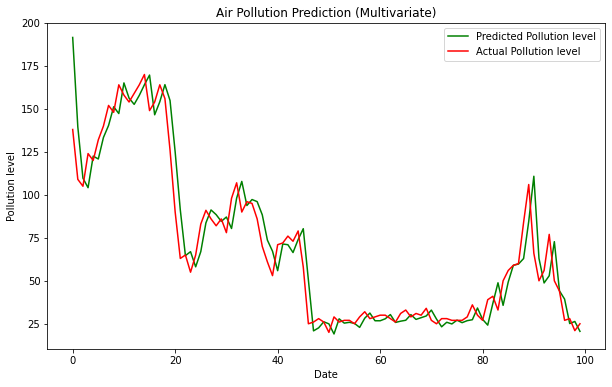

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot the graph between actual vs predicted values
plt.figure(figsize=(10,6))  
plt.plot(Y_predicted[:100,:], color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested[:100,:] , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("Pollution level")
plt.legend()
plt.show()
plt.savefig('graph.png')

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
print('MAPE', mape)


MAPE inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
#print('Mean squared error', mse)
print('RMSE' , np.sqrt(mse))
print("Mean of Test data ", np.mean(Y_tested))

RMSE 28.14425
Mean of Test data  96.041435
